# MSA 2023 Phase 2 - Part 2 - Classification

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

## 1. Load and split preprocessed data

In [2]:
# Load preprocessed data
market_segmentation = pd.read_csv("../1. Analysis and Preprocessing/preprocessed_datasets/market_segmentation.csv")
market_segmentation.head()

,Age,Family_Size,Segmentation,Graduated_Yes,Ever_Married_Yes,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,0.521127,0.000,A,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0.450704,0.000,A,1,1,0,0,1,1,0,0,0,0,0,0,0,0
2,0.281690,0.250,A,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,1.000000,0.000,A,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,0.267606,0.375,A,1,0,0,0,1,1,0,0,0,0,0,0,0,0


In [3]:
# Load preprocessed data with interaction
market_segmentation_interaction = pd.read_csv("../1. Analysis and Preprocessing/preprocessed_datasets/market_segmentation_interaction.csv")
market_segmentation_interaction.head()

,Age,Family_Size,Segmentation,Graduated_Yes,Ever_Married_Yes,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Profession_Artist,Profession_Doctor,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Age_Segment_Adult,Age_Segment_Elderly,Age_Segment_Middle_Aged,Age_Adult,Age_Middle_Aged,Age_Elderly
0,0.521127,0.000,A,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0.000000,0.521127,0.0
1,0.450704,0.000,A,1,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0.000000,0.450704,0.0
2,0.281690,0.250,A,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0.281690,0.000000,0.0
3,1.000000,0.000,A,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0.000000,0.000000,1.0
4,0.267606,0.375,A,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0.267606,0.000000,0.0


In [4]:
# Get the features of the dataset
X_rf = market_segmentation.drop(columns=["Segmentation"])
X_lg = market_segmentation_interaction.drop(columns=["Segmentation"])

# Get the target of the dataset
y = market_segmentation.Segmentation

# Create an 70-30 train-test split on the dataset
X_rf_train, X_rf_test, y_train, y_test = train_test_split(X_rf, y, test_size=0.3, random_state=101)

# Create an 70-30 train-test split on the dataset with interaction
X_lg_train, X_lg_test, y_train, y_test = train_test_split(X_lg, y, test_size=0.3, random_state=101)

## 2. Choose an algorithm

In [5]:
# Load an untuned logistic regression model
lg_model = LogisticRegression()

# Load an untuned random forest classifier model
rf_model = RandomForestClassifier()

## 3. Train and test a model

In [6]:
# Train the logistic regression model using the training set
lg_model.fit(X_lg_train, y_train)

# Get predictions using the features of the test set
lg_predictions = lg_model.predict(X_lg_test)

# Test the model using predictions and the targets of the test set
lg_accuracy = accuracy_score(y_test, lg_predictions)

lg_accuracy

c:\Users\angel\Documents\MSA\2023-Phase-2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5140488254260709

In [7]:
# Train the random forest model using the training set without interaction
rf_model.fit(X_rf_train, y_train)

# Get predictions using the features of the test set
rf_predictions = rf_model.predict(X_rf_test)

# Test the model using predictions and the targets of the test set
rf_accuracy = accuracy_score(y_test, rf_predictions)

rf_accuracy

0.4758175955780746

## 4. Evaluate the model 

### Confusion Matrices

In the confusion matrices, the diagonals are the correct classifications and the other cells are the misclassifications.

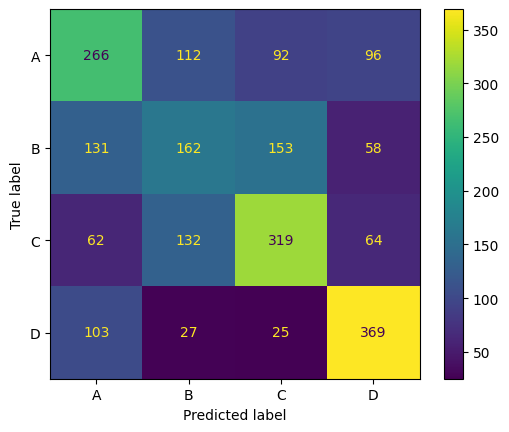

In [8]:
# Evaluate the confusion matrix of the logistic regression model
lg_cm = confusion_matrix(y_test, lg_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=lg_cm, display_labels=lg_model.classes_)
disp.plot()

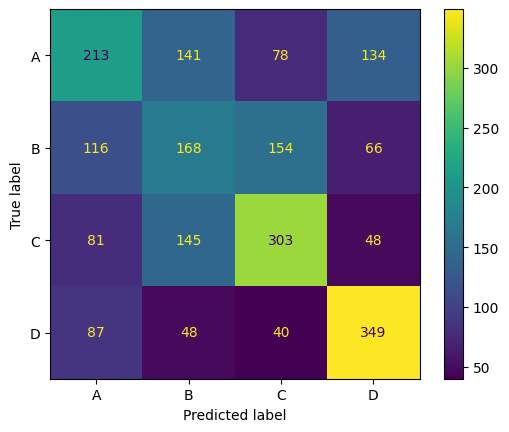

In [9]:
# Evaluate the confusion matrix of the random forest model
rf_cm = confusion_matrix(y_test, rf_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=lg_model.classes_)
disp.plot()

Both models performed had similar confusion matrices, although the logistic regression model had a higher proportion of correct classifications than the random forest model. The D label appears to have the highest classification rate for both models.

### Classification Metrics

Precision is the proportion of true positives out of predicted positives.

Recall is the proportion of true positives out of total actual positives.

The F1-score is a function combining the precision and recall.

In [11]:
# Evaluate the precision, recall and f1-score for each class of the logistic regression model
pd.DataFrame(classification_report(y_test, lg_predictions, output_dict=True))

,A,B,C,D,accuracy,macro avg,weighted avg
precision,0.473310,0.374134,0.541596,0.628620,0.514049,0.504415,0.505921
recall,0.469965,0.321429,0.552860,0.704198,0.514049,0.512113,0.514049
f1-score,0.471631,0.345784,0.547170,0.664266,0.514049,0.507213,0.508987
support,566.000000,504.000000,577.000000,524.000000,0.514049,2171.000000,2171.000000


In [13]:
# Evaluate the precision, recall and f1-score for each class of the random forest model
pd.DataFrame(classification_report(y_test, rf_predictions, output_dict=True))

,A,B,C,D,accuracy,macro avg,weighted avg
precision,0.428571,0.334661,0.526957,0.584590,0.475818,0.468695,0.470576
recall,0.376325,0.333333,0.525130,0.666031,0.475818,0.475205,0.475818
f1-score,0.400753,0.333996,0.526042,0.622658,0.475818,0.470862,0.472114
support,566.000000,504.000000,577.000000,524.000000,0.475818,2171.000000,2171.000000


The logistic regression model performed better in most metrics compared to the random forest model.

### ROC Curves

In [14]:
# Binarise the target by one-hot-encoding
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

def plot_ovr_roc_curve(model, X_test):
    # Get the class probabilities
    y_score = model.predict_proba(X_test)

    # Create figure
    fig, ax = plt.subplots()

    # Loop through each segmentation class
    for class_of_interest in ["A", "B", "C", "D"]:
        # Get the class id
        class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

        # Display the ROC curve of the class of interest vs the rest of the classes
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"{class_of_interest} vs the rest",
            ax=ax,
        )

    # Plot labels
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("One-vs-Rest ROC curves")
    plt.legend()
    plt.show()

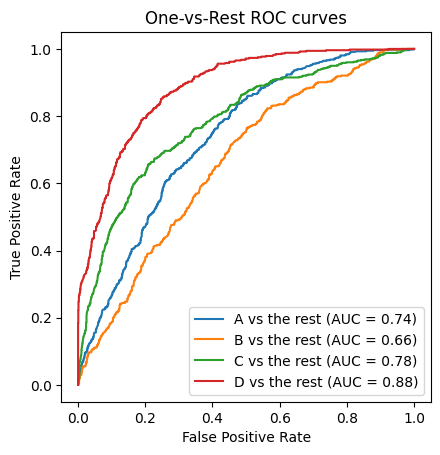

In [15]:
# Plot the OvR ROC curves for the logistic regression model
plot_ovr_roc_curve(lg_model, X_lg_test)

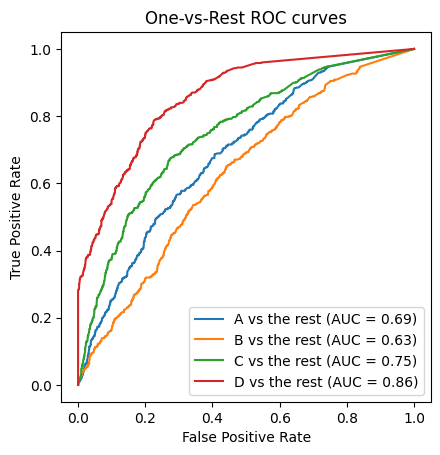

In [16]:
# Plot the OvR ROC curves for the random forest model
plot_ovr_roc_curve(rf_model, X_rf_test)

### Prediction counts

In [19]:
# Count the occurrences of each predicted class
np.unique(lg_predictions, return_counts=True)

(array(['A', 'B', 'C', 'D'], dtype=object),
 array([562, 433, 589, 587], dtype=int64))

In [20]:
np.unique(rf_predictions, return_counts=True)

(array(['A', 'B', 'C', 'D'], dtype=object),
 array([497, 502, 575, 597], dtype=int64))

### Model Features

In [24]:
# Evaluate coefficients for the logistic regression model
pd.DataFrame({
    "Feature": X_lg_test.columns,
    "Coefficient (A vs Rest)": lg_model.coef_[0],
    "Coefficient (B vs Rest)": lg_model.coef_[1],
    "Coefficient (C vs Rest)": lg_model.coef_[2],
    "Coefficient (D vs Rest)": lg_model.coef_[3],
})

,Feature,Coefficient (A vs Rest),Coefficient (B vs Rest),Coefficient (C vs Rest),Coefficient (D vs Rest)
0,Age,0.499194,0.536914,0.408774,-1.444881
1,Family_Size,-0.851506,0.057741,1.312945,-0.519180
2,Graduated_Yes,-0.228897,0.115087,0.721630,-0.607819
3,Ever_Married_Yes,0.039996,0.121883,-0.128689,-0.033190
4,Spending_Score_Average,-0.228423,0.092951,0.447961,-0.312488
5,Spending_Score_High,0.050680,0.104738,0.067265,-0.222683
6,Spending_Score_Low,0.234789,-0.236141,-0.716711,0.718063
7,Profession_Artist,-0.100542,0.604707,0.862129,-1.366294
8,Profession_Doctor,-0.029414,0.268101,0.284369,-0.523056
9,Profession_Engineer,0.329025,0.531835,-0.600519,-0.260340


In [29]:
# Evaluate feature importance for the random forest model
pd.DataFrame({
    "Feature": X_rf_test.columns,
    "Importance": rf_model.feature_importances_
})

,Feature,Importance
0,Age,0.548442
1,Family_Size,0.156047
2,Graduated_Yes,0.044550
3,Ever_Married_Yes,0.034609
4,Spending_Score_Average,0.017421
5,Spending_Score_High,0.008460
6,Spending_Score_Low,0.034416
7,Profession_Artist,0.040795
8,Profession_Doctor,0.013560
9,Profession_Engineer,0.013425


### Saving the Model

In [55]:
# Save the logistic regression model
pickle.dump(lg_model, open("outputs/lg-model.pkl", "wb"))

# Save the random forest model
pickle.dump(rf_model, open("outputs/rf-model.pkl", "wb"))

## 5. Summary

I first split the preprocessed market segmentation data into the test and training sets. I then trained both a logistic regression model and a random forest model on the training set using default settings. For the logistic regression model, I used the preprocessed data with the interaction terms as the model was linear. For the random forest model, I used the preprocessed data without the interaction terms as the interactions can be modelled by the branches.

After the training the model, I calculated the overall accuracy of the model on the test set. The logistic regression model achieved an accuracy of 0.51 and the random forest model achieved an accuracy of 0.48. I also evaluated the confusion matrix and classification metrics of each model to evaluate how they predict each class. The logistic regression model achieved better precision in predicting all classes and better f1-scores in predicting all but the B class. I also evaluated the One-vs-Rest ROC curves for each model and found that the logistic regression model achieved better AUC scores for each class.

Both models predicted the D class the best and the B class the worst. By examining the model coefficients for the logistic regression model and the feature importance for the random forest model, the age and family size appeared to contribute the most to the models. For the logistic regression model, there is a large negative coefficient for age in predicting class D, which means higher ages are less likely to be in class D, which we can verify by the explatory analysis conducted in Part 1 where we see that class D made a significant proportion of the younger age group. The strong contribution of age explains why the model predicted class D the best.

Overall, the logistic regression model performed better than the random forest model in predictions. However, the model were trained on default settings. For the next steps, I would tune to models to achieve higher accuracies. I could also change the preprocessing pipeline to add or remove features from the dataset.